[View in Colaboratory](https://colab.research.google.com/github/johnphilip283/MNIST-Denoising-Autoencoder/blob/master/MNIST_Autoencoder.ipynb)

In [0]:
import tensorflow as tf
import numpy as np
from skimage import transform
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data

In [0]:
def reconstruct(data):
  
  data += tf.random_normal(tf.shape(data))
  
  conv1 = tf.layers.conv2d(data, 32, 4, 2, activation=tf.nn.relu, padding="SAME")
  conv2 = tf.layers.conv2d(conv1, 16, 4, 2, activation=tf.nn.relu, padding="SAME")
  conv3 = tf.layers.conv2d(conv2, 8, 4, 2, activation=tf.nn.relu, padding="SAME")
  
  # 32 x 32 x 1 -> 16 x 16 x 32
  # 16 x 16 x 32 -> 8 x 8 x 16
  # 8 x 8 x 16 -> 4 x 4 x 8
  
  conv4 = tf.layers.conv2d_transpose(conv3, 16, 4, 2, activation=tf.nn.relu, padding="SAME")
  conv5 = tf.layers.conv2d_transpose(conv4, 32, 4, 2, activation=tf.nn.relu, padding="SAME")
  final = tf.layers.conv2d_transpose(conv5, 1, 4, 2, activation=tf.nn.relu, padding="SAME")
  
  return final

def resize_images(images):
  
  # Just it case it isn't in this form yet, reshape the tensor.
  images = images.reshape((-1, 28, 28, 1))
  
  # Initialize a tensor full of zeroes to hold the correct resized tensor
  resized_images = np.zeros((images.shape[0], 32, 32, 1))
  
  # For each image in the batch we have,
  for i in range(images.shape[0]):
    
    # find the correct slot in the resultant batch, and store the resized image there.
    resized_images[i, ..., 0] = transform.resize(images[i, ..., 0], (32, 32))
    
  return resized_images

In [23]:
inputs = tf.placeholder(tf.float32, shape=(None, 32, 32, 1))
rec_images = reconstruct(inputs)
loss = tf.reduce_mean(tf.square(rec_images - inputs))
train_op = tf.train.GradientDescentOptimizer(0.5).minimize(loss)

mnist = input_data.read_data_sets("MNIST_data", one_hot=True)
batch_size = 300
epochs = 7
num_batches = mnist.train.num_examples // batch_size

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


Epoch: 1 - cost= 0.10356


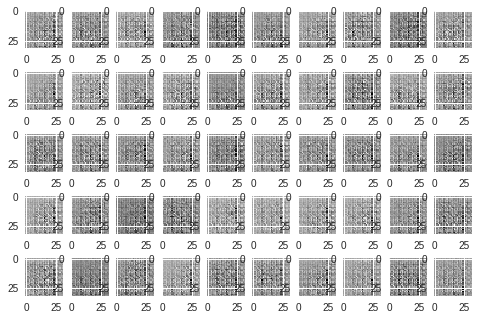

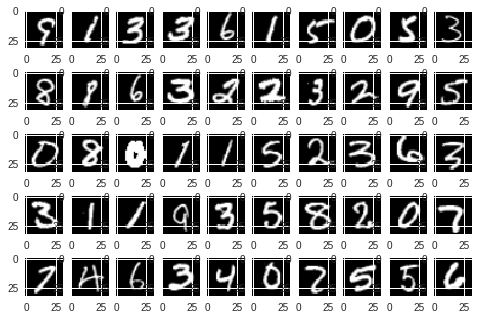

Epoch: 1 - cost= 0.08512
Epoch: 1 - cost= 0.08488
Epoch: 1 - cost= 0.08322
Epoch: 1 - cost= 0.08528
Epoch: 1 - cost= 0.08247
Epoch: 1 - cost= 0.08284
Epoch: 1 - cost= 0.08544
Epoch: 1 - cost= 0.08167
Epoch: 1 - cost= 0.08345
Epoch: 1 - cost= 0.08380
Epoch: 1 - cost= 0.08418
Epoch: 1 - cost= 0.08221
Epoch: 1 - cost= 0.07955
Epoch: 1 - cost= 0.08330
Epoch: 1 - cost= 0.08305
Epoch: 1 - cost= 0.08244
Epoch: 1 - cost= 0.08542
Epoch: 1 - cost= 0.08387
Epoch: 1 - cost= 0.08511
Epoch: 1 - cost= 0.08348
Epoch: 1 - cost= 0.07925
Epoch: 1 - cost= 0.08309
Epoch: 1 - cost= 0.08373
Epoch: 1 - cost= 0.08000
Epoch: 1 - cost= 0.08512
Epoch: 1 - cost= 0.08338
Epoch: 1 - cost= 0.08496
Epoch: 1 - cost= 0.08179
Epoch: 1 - cost= 0.08270
Epoch: 1 - cost= 0.08170
Epoch: 1 - cost= 0.08499
Epoch: 1 - cost= 0.08393
Epoch: 1 - cost= 0.08237
Epoch: 1 - cost= 0.08305
Epoch: 1 - cost= 0.08276
Epoch: 1 - cost= 0.08579
Epoch: 1 - cost= 0.08224
Epoch: 1 - cost= 0.08202
Epoch: 1 - cost= 0.08363
Epoch: 1 - cost= 0.08567


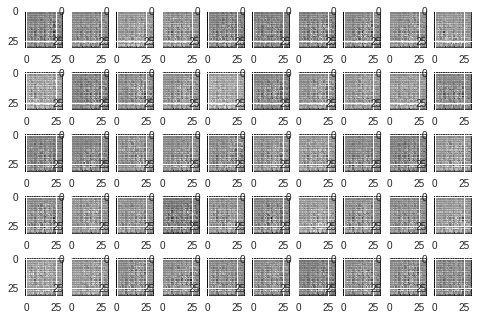

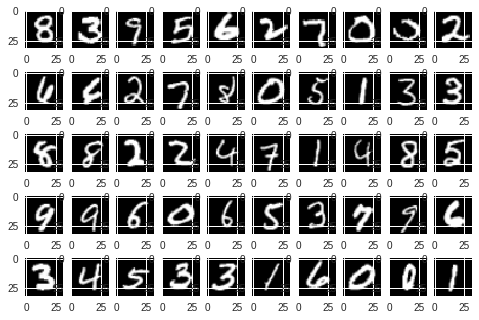

Epoch: 1 - cost= 0.08526
Epoch: 1 - cost= 0.08877
Epoch: 1 - cost= 0.08490
Epoch: 1 - cost= 0.08261
Epoch: 1 - cost= 0.08392
Epoch: 1 - cost= 0.08336
Epoch: 1 - cost= 0.08387
Epoch: 1 - cost= 0.08316
Epoch: 1 - cost= 0.08334
Epoch: 1 - cost= 0.08215
Epoch: 1 - cost= 0.08128
Epoch: 1 - cost= 0.08374
Epoch: 1 - cost= 0.08201
Epoch: 1 - cost= 0.08248
Epoch: 1 - cost= 0.08503
Epoch: 1 - cost= 0.08405
Epoch: 1 - cost= 0.08184
Epoch: 1 - cost= 0.08074
Epoch: 1 - cost= 0.08235
Epoch: 1 - cost= 0.08287
Epoch: 1 - cost= 0.08503
Epoch: 1 - cost= 0.08259
Epoch: 1 - cost= 0.08292
Epoch: 1 - cost= 0.08422
Epoch: 1 - cost= 0.08477
Epoch: 1 - cost= 0.08277
Epoch: 1 - cost= 0.08253
Epoch: 1 - cost= 0.07956
Epoch: 1 - cost= 0.08193
Epoch: 1 - cost= 0.08154
Epoch: 1 - cost= 0.08378
Epoch: 1 - cost= 0.08419
Epoch: 1 - cost= 0.08152
Epoch: 1 - cost= 0.08280
Epoch: 1 - cost= 0.08281
Epoch: 1 - cost= 0.08421
Epoch: 1 - cost= 0.08296
Epoch: 1 - cost= 0.08335
Epoch: 1 - cost= 0.07787
Epoch: 1 - cost= 0.08309


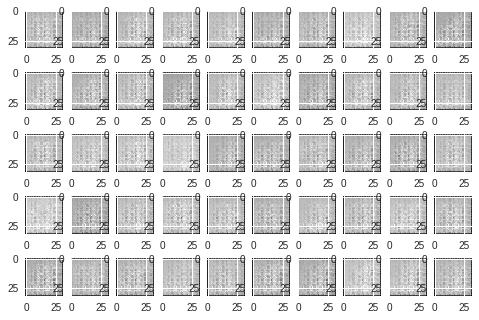

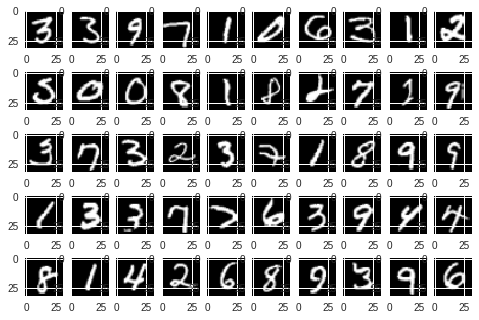

Epoch: 2 - cost= 0.07939
Epoch: 2 - cost= 0.08234
Epoch: 2 - cost= 0.08044
Epoch: 2 - cost= 0.08108
Epoch: 2 - cost= 0.08244
Epoch: 2 - cost= 0.08236
Epoch: 2 - cost= 0.07947
Epoch: 2 - cost= 0.08332
Epoch: 2 - cost= 0.08233
Epoch: 2 - cost= 0.08046
Epoch: 2 - cost= 0.07706
Epoch: 2 - cost= 0.08144
Epoch: 2 - cost= 0.08078
Epoch: 2 - cost= 0.07990
Epoch: 2 - cost= 0.08033
Epoch: 2 - cost= 0.07974
Epoch: 2 - cost= 0.07932
Epoch: 2 - cost= 0.07823
Epoch: 2 - cost= 0.07885
Epoch: 2 - cost= 0.08214
Epoch: 2 - cost= 0.07948
Epoch: 2 - cost= 0.07956
Epoch: 2 - cost= 0.07934
Epoch: 2 - cost= 0.07814
Epoch: 2 - cost= 0.08032
Epoch: 2 - cost= 0.07642
Epoch: 2 - cost= 0.07928
Epoch: 2 - cost= 0.07869
Epoch: 2 - cost= 0.07945
Epoch: 2 - cost= 0.07608
Epoch: 2 - cost= 0.07835
Epoch: 2 - cost= 0.07939
Epoch: 2 - cost= 0.07935
Epoch: 2 - cost= 0.07864
Epoch: 2 - cost= 0.07797
Epoch: 2 - cost= 0.07730
Epoch: 2 - cost= 0.07703
Epoch: 2 - cost= 0.07668
Epoch: 2 - cost= 0.07841
Epoch: 2 - cost= 0.07350


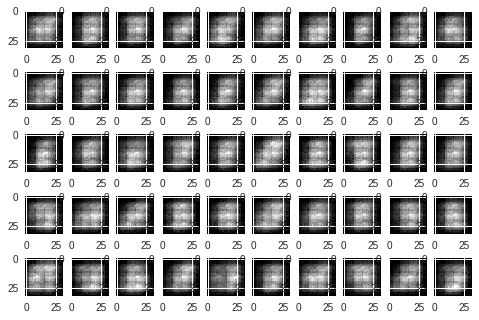

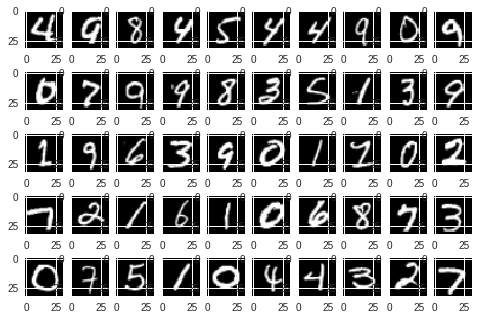

Epoch: 2 - cost= 0.06318
Epoch: 2 - cost= 0.06072
Epoch: 2 - cost= 0.07502
Epoch: 2 - cost= 0.05873
Epoch: 2 - cost= 0.06663
Epoch: 2 - cost= 0.05910
Epoch: 2 - cost= 0.06904
Epoch: 2 - cost= 0.06109
Epoch: 2 - cost= 0.06793
Epoch: 2 - cost= 0.05759
Epoch: 2 - cost= 0.06793
Epoch: 2 - cost= 0.06120
Epoch: 2 - cost= 0.06815
Epoch: 2 - cost= 0.05940
Epoch: 2 - cost= 0.06247
Epoch: 2 - cost= 0.05834
Epoch: 2 - cost= 0.06809
Epoch: 2 - cost= 0.05902
Epoch: 2 - cost= 0.06710
Epoch: 2 - cost= 0.05902
Epoch: 2 - cost= 0.06395
Epoch: 2 - cost= 0.05717
Epoch: 2 - cost= 0.06467
Epoch: 2 - cost= 0.05979
Epoch: 2 - cost= 0.06953
Epoch: 2 - cost= 0.05485
Epoch: 2 - cost= 0.06004
Epoch: 2 - cost= 0.05610
Epoch: 2 - cost= 0.06101
Epoch: 2 - cost= 0.05644
Epoch: 2 - cost= 0.06497
Epoch: 2 - cost= 0.05577
Epoch: 2 - cost= 0.06282
Epoch: 2 - cost= 0.05621
Epoch: 2 - cost= 0.06394
Epoch: 2 - cost= 0.05537
Epoch: 2 - cost= 0.06184
Epoch: 2 - cost= 0.05677
Epoch: 2 - cost= 0.06315
Epoch: 2 - cost= 0.05565


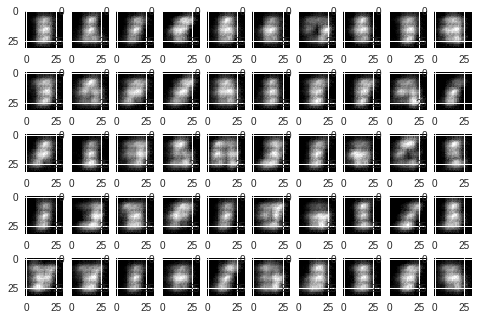

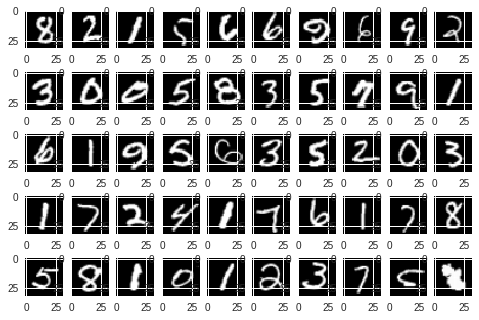

Epoch: 3 - cost= 0.05119
Epoch: 3 - cost= 0.05115
Epoch: 3 - cost= 0.05094
Epoch: 3 - cost= 0.05045
Epoch: 3 - cost= 0.05173
Epoch: 3 - cost= 0.04884
Epoch: 3 - cost= 0.05203
Epoch: 3 - cost= 0.05114
Epoch: 3 - cost= 0.05247
Epoch: 3 - cost= 0.05047
Epoch: 3 - cost= 0.05235
Epoch: 3 - cost= 0.05065
Epoch: 3 - cost= 0.05081
Epoch: 3 - cost= 0.05015
Epoch: 3 - cost= 0.05195
Epoch: 3 - cost= 0.04950
Epoch: 3 - cost= 0.05439
Epoch: 3 - cost= 0.05078
Epoch: 3 - cost= 0.05338
Epoch: 3 - cost= 0.04956
Epoch: 3 - cost= 0.05382
Epoch: 3 - cost= 0.04982
Epoch: 3 - cost= 0.04979
Epoch: 3 - cost= 0.04920
Epoch: 3 - cost= 0.04946
Epoch: 3 - cost= 0.04938
Epoch: 3 - cost= 0.04808
Epoch: 3 - cost= 0.04795
Epoch: 3 - cost= 0.05070
Epoch: 3 - cost= 0.05077
Epoch: 3 - cost= 0.05346
Epoch: 3 - cost= 0.04973
Epoch: 3 - cost= 0.05600
Epoch: 3 - cost= 0.05057
Epoch: 3 - cost= 0.05317
Epoch: 3 - cost= 0.04862
Epoch: 3 - cost= 0.05031
Epoch: 3 - cost= 0.04802
Epoch: 3 - cost= 0.04936
Epoch: 3 - cost= 0.04869


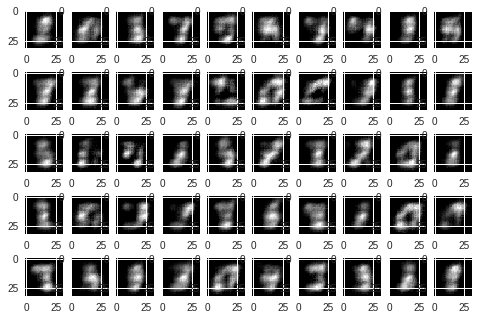

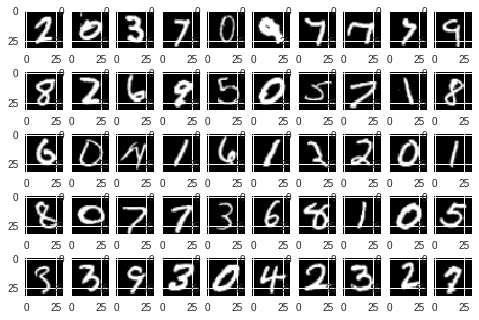

Epoch: 3 - cost= 0.04474
Epoch: 3 - cost= 0.04796
Epoch: 3 - cost= 0.04672
Epoch: 3 - cost= 0.05207
Epoch: 3 - cost= 0.04705
Epoch: 3 - cost= 0.05261
Epoch: 3 - cost= 0.04577
Epoch: 3 - cost= 0.04799
Epoch: 3 - cost= 0.04533
Epoch: 3 - cost= 0.04598
Epoch: 3 - cost= 0.04370
Epoch: 3 - cost= 0.04623
Epoch: 3 - cost= 0.04494
Epoch: 3 - cost= 0.04537
Epoch: 3 - cost= 0.04539
Epoch: 3 - cost= 0.04654
Epoch: 3 - cost= 0.04452
Epoch: 3 - cost= 0.04652
Epoch: 3 - cost= 0.04497
Epoch: 3 - cost= 0.04452
Epoch: 3 - cost= 0.04350
Epoch: 3 - cost= 0.04598
Epoch: 3 - cost= 0.04328
Epoch: 3 - cost= 0.04432
Epoch: 3 - cost= 0.04275
Epoch: 3 - cost= 0.04430
Epoch: 3 - cost= 0.04273
Epoch: 3 - cost= 0.04431
Epoch: 3 - cost= 0.04398
Epoch: 3 - cost= 0.04355
Epoch: 3 - cost= 0.04516
Epoch: 3 - cost= 0.04469
Epoch: 3 - cost= 0.04487
Epoch: 3 - cost= 0.04442
Epoch: 3 - cost= 0.04377
Epoch: 3 - cost= 0.04429
Epoch: 3 - cost= 0.04491
Epoch: 3 - cost= 0.04551
Epoch: 3 - cost= 0.04283
Epoch: 3 - cost= 0.04526


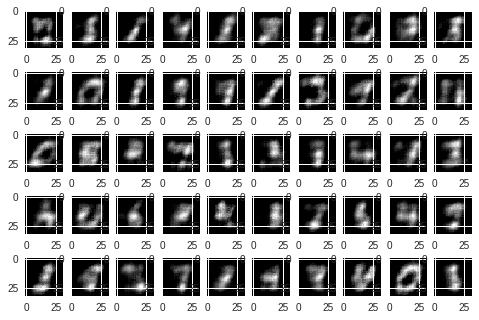

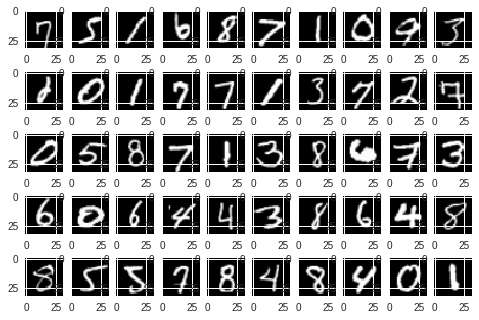

Epoch: 4 - cost= 0.04364
Epoch: 4 - cost= 0.04544
Epoch: 4 - cost= 0.04362
Epoch: 4 - cost= 0.04294
Epoch: 4 - cost= 0.04243
Epoch: 4 - cost= 0.04280
Epoch: 4 - cost= 0.04096
Epoch: 4 - cost= 0.04295
Epoch: 4 - cost= 0.04257
Epoch: 4 - cost= 0.04333
Epoch: 4 - cost= 0.04058
Epoch: 4 - cost= 0.04311
Epoch: 4 - cost= 0.04179
Epoch: 4 - cost= 0.04501
Epoch: 4 - cost= 0.04286
Epoch: 4 - cost= 0.04483
Epoch: 4 - cost= 0.04189
Epoch: 4 - cost= 0.04584
Epoch: 4 - cost= 0.04233
Epoch: 4 - cost= 0.04410
Epoch: 4 - cost= 0.04085
Epoch: 4 - cost= 0.04363
Epoch: 4 - cost= 0.04250
Epoch: 4 - cost= 0.04208
Epoch: 4 - cost= 0.03999
Epoch: 4 - cost= 0.04159
Epoch: 4 - cost= 0.04174
Epoch: 4 - cost= 0.04252
Epoch: 4 - cost= 0.04203
Epoch: 4 - cost= 0.04503
Epoch: 4 - cost= 0.04212
Epoch: 4 - cost= 0.04539
Epoch: 4 - cost= 0.04111
Epoch: 4 - cost= 0.04280
Epoch: 4 - cost= 0.04137
Epoch: 4 - cost= 0.04365
Epoch: 4 - cost= 0.04153
Epoch: 4 - cost= 0.04472
Epoch: 4 - cost= 0.04256
Epoch: 4 - cost= 0.04494


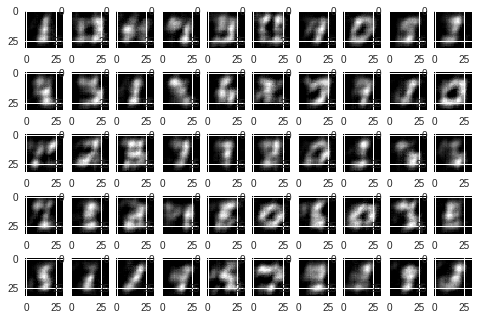

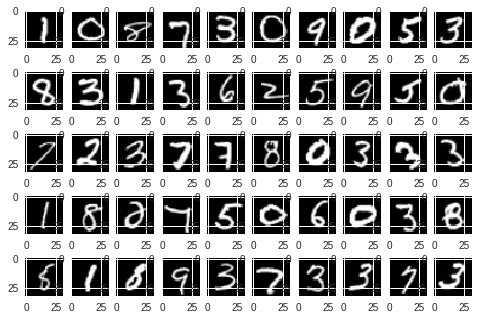

Epoch: 4 - cost= 0.03890
Epoch: 4 - cost= 0.03844
Epoch: 4 - cost= 0.04090
Epoch: 4 - cost= 0.03894
Epoch: 4 - cost= 0.04051
Epoch: 4 - cost= 0.03883
Epoch: 4 - cost= 0.03943
Epoch: 4 - cost= 0.03968
Epoch: 4 - cost= 0.04237
Epoch: 4 - cost= 0.04040
Epoch: 4 - cost= 0.04147
Epoch: 4 - cost= 0.03938
Epoch: 4 - cost= 0.04091
Epoch: 4 - cost= 0.03805
Epoch: 4 - cost= 0.03886
Epoch: 4 - cost= 0.03899
Epoch: 4 - cost= 0.03946
Epoch: 4 - cost= 0.03940
Epoch: 4 - cost= 0.04175
Epoch: 4 - cost= 0.04007
Epoch: 4 - cost= 0.04149
Epoch: 4 - cost= 0.03852
Epoch: 4 - cost= 0.04217
Epoch: 4 - cost= 0.04042
Epoch: 4 - cost= 0.04164
Epoch: 4 - cost= 0.03958
Epoch: 4 - cost= 0.03991
Epoch: 4 - cost= 0.03847
Epoch: 4 - cost= 0.03921
Epoch: 4 - cost= 0.03897
Epoch: 4 - cost= 0.03829
Epoch: 4 - cost= 0.03864
Epoch: 4 - cost= 0.03897
Epoch: 4 - cost= 0.03885
Epoch: 4 - cost= 0.03738
Epoch: 4 - cost= 0.03751
Epoch: 4 - cost= 0.03813
Epoch: 4 - cost= 0.03779
Epoch: 4 - cost= 0.03825
Epoch: 4 - cost= 0.03725


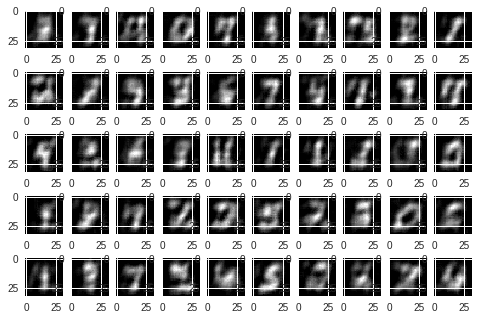

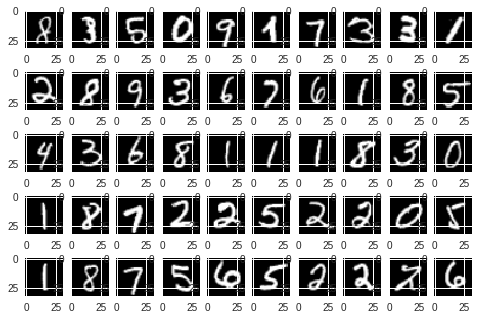

Epoch: 5 - cost= 0.03848
Epoch: 5 - cost= 0.03711
Epoch: 5 - cost= 0.03757
Epoch: 5 - cost= 0.03680
Epoch: 5 - cost= 0.03737
Epoch: 5 - cost= 0.03720
Epoch: 5 - cost= 0.03835
Epoch: 5 - cost= 0.03817
Epoch: 5 - cost= 0.03689
Epoch: 5 - cost= 0.03681
Epoch: 5 - cost= 0.03784
Epoch: 5 - cost= 0.03860
Epoch: 5 - cost= 0.03864
Epoch: 5 - cost= 0.03768
Epoch: 5 - cost= 0.03900
Epoch: 5 - cost= 0.03843
Epoch: 5 - cost= 0.03929
Epoch: 5 - cost= 0.03702
Epoch: 5 - cost= 0.03846
Epoch: 5 - cost= 0.03688
Epoch: 5 - cost= 0.03869
Epoch: 5 - cost= 0.03624
Epoch: 5 - cost= 0.03820
Epoch: 5 - cost= 0.03764
Epoch: 5 - cost= 0.03966
Epoch: 5 - cost= 0.03828
Epoch: 5 - cost= 0.04057
Epoch: 5 - cost= 0.03672
Epoch: 5 - cost= 0.03828
Epoch: 5 - cost= 0.03737
Epoch: 5 - cost= 0.03801
Epoch: 5 - cost= 0.03702
Epoch: 5 - cost= 0.03770
Epoch: 5 - cost= 0.03606
Epoch: 5 - cost= 0.03684
Epoch: 5 - cost= 0.03684
Epoch: 5 - cost= 0.03783
Epoch: 5 - cost= 0.03633
Epoch: 5 - cost= 0.03683
Epoch: 5 - cost= 0.03563


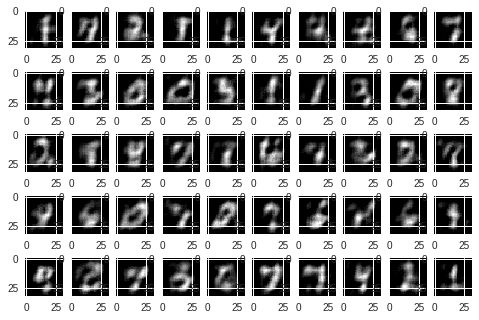

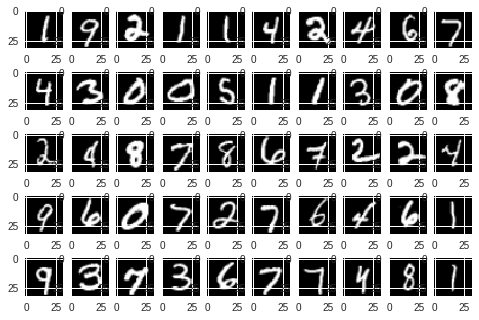

Epoch: 5 - cost= 0.03454
Epoch: 5 - cost= 0.03397
Epoch: 5 - cost= 0.03543
Epoch: 5 - cost= 0.03664
Epoch: 5 - cost= 0.03610
Epoch: 5 - cost= 0.03734
Epoch: 5 - cost= 0.03591
Epoch: 5 - cost= 0.03796
Epoch: 5 - cost= 0.03606
Epoch: 5 - cost= 0.03851
Epoch: 5 - cost= 0.03666
Epoch: 5 - cost= 0.03782
Epoch: 5 - cost= 0.03674
Epoch: 5 - cost= 0.03755
Epoch: 5 - cost= 0.03600
Epoch: 5 - cost= 0.03807
Epoch: 5 - cost= 0.03619
Epoch: 5 - cost= 0.03669
Epoch: 5 - cost= 0.03521
Epoch: 5 - cost= 0.03642
Epoch: 5 - cost= 0.03596
Epoch: 5 - cost= 0.03688
Epoch: 5 - cost= 0.03528
Epoch: 5 - cost= 0.03749
Epoch: 5 - cost= 0.03640
Epoch: 5 - cost= 0.03675
Epoch: 5 - cost= 0.03497
Epoch: 5 - cost= 0.03653
Epoch: 5 - cost= 0.03608
Epoch: 5 - cost= 0.03754
Epoch: 5 - cost= 0.03550
Epoch: 5 - cost= 0.03769
Epoch: 5 - cost= 0.03610
Epoch: 5 - cost= 0.03714
Epoch: 5 - cost= 0.03586
Epoch: 5 - cost= 0.03759
Epoch: 5 - cost= 0.03567
Epoch: 5 - cost= 0.03769
Epoch: 5 - cost= 0.03578
Epoch: 5 - cost= 0.03685


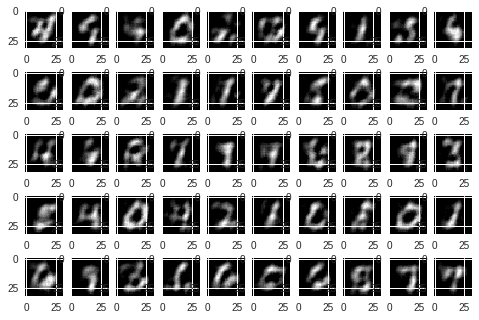

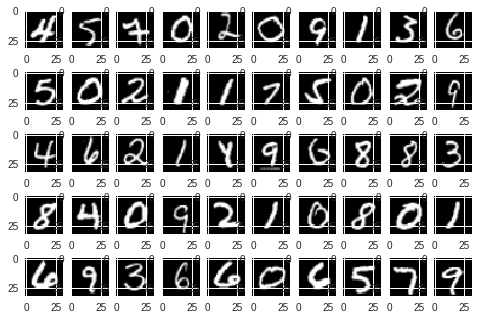

Epoch: 6 - cost= 0.03407
Epoch: 6 - cost= 0.03347
Epoch: 6 - cost= 0.03398
Epoch: 6 - cost= 0.03485
Epoch: 6 - cost= 0.03397
Epoch: 6 - cost= 0.03616
Epoch: 6 - cost= 0.03473
Epoch: 6 - cost= 0.03602
Epoch: 6 - cost= 0.03419
Epoch: 6 - cost= 0.03658
Epoch: 6 - cost= 0.03538
Epoch: 6 - cost= 0.03818
Epoch: 6 - cost= 0.03628
Epoch: 6 - cost= 0.03654
Epoch: 6 - cost= 0.03547
Epoch: 6 - cost= 0.03608
Epoch: 6 - cost= 0.03572
Epoch: 6 - cost= 0.03765
Epoch: 6 - cost= 0.03640
Epoch: 6 - cost= 0.03739
Epoch: 6 - cost= 0.03440
Epoch: 6 - cost= 0.03678
Epoch: 6 - cost= 0.03457
Epoch: 6 - cost= 0.03691
Epoch: 6 - cost= 0.03484
Epoch: 6 - cost= 0.03594
Epoch: 6 - cost= 0.03508
Epoch: 6 - cost= 0.03753
Epoch: 6 - cost= 0.03427
Epoch: 6 - cost= 0.03567
Epoch: 6 - cost= 0.03474
Epoch: 6 - cost= 0.03486
Epoch: 6 - cost= 0.03468
Epoch: 6 - cost= 0.03409
Epoch: 6 - cost= 0.03452
Epoch: 6 - cost= 0.03552
Epoch: 6 - cost= 0.03372
Epoch: 6 - cost= 0.03382
Epoch: 6 - cost= 0.03464
Epoch: 6 - cost= 0.03523


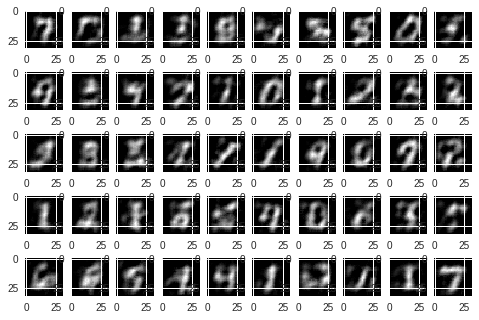

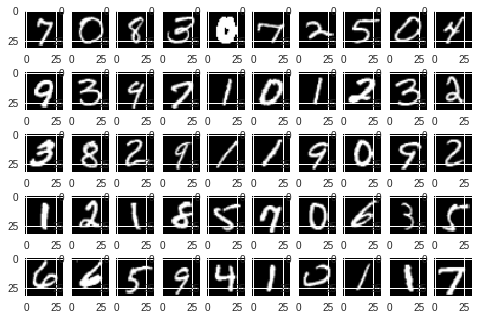

Epoch: 6 - cost= 0.03485
Epoch: 6 - cost= 0.03352
Epoch: 6 - cost= 0.03392
Epoch: 6 - cost= 0.03294
Epoch: 6 - cost= 0.03142
Epoch: 6 - cost= 0.03199
Epoch: 6 - cost= 0.03273
Epoch: 6 - cost= 0.03205
Epoch: 6 - cost= 0.03258
Epoch: 6 - cost= 0.03207
Epoch: 6 - cost= 0.03250
Epoch: 6 - cost= 0.03300
Epoch: 6 - cost= 0.03339
Epoch: 6 - cost= 0.03237
Epoch: 6 - cost= 0.03291
Epoch: 6 - cost= 0.03333
Epoch: 6 - cost= 0.03234
Epoch: 6 - cost= 0.03300
Epoch: 6 - cost= 0.03357
Epoch: 6 - cost= 0.03233
Epoch: 6 - cost= 0.03371
Epoch: 6 - cost= 0.03358
Epoch: 6 - cost= 0.03336
Epoch: 6 - cost= 0.03371
Epoch: 6 - cost= 0.03427
Epoch: 6 - cost= 0.03381
Epoch: 6 - cost= 0.03474
Epoch: 6 - cost= 0.03453
Epoch: 6 - cost= 0.03448
Epoch: 6 - cost= 0.03385
Epoch: 6 - cost= 0.03606
Epoch: 6 - cost= 0.03402
Epoch: 6 - cost= 0.03508
Epoch: 6 - cost= 0.03393
Epoch: 6 - cost= 0.03426
Epoch: 6 - cost= 0.03207
Epoch: 6 - cost= 0.03273
Epoch: 6 - cost= 0.03261
Epoch: 6 - cost= 0.03196
Epoch: 6 - cost= 0.03224


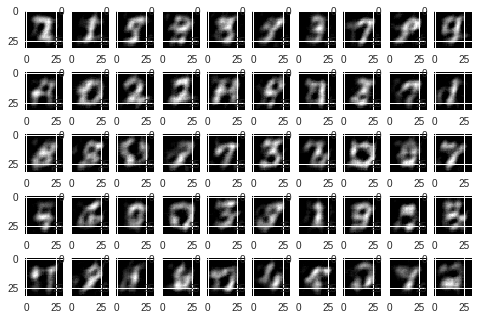

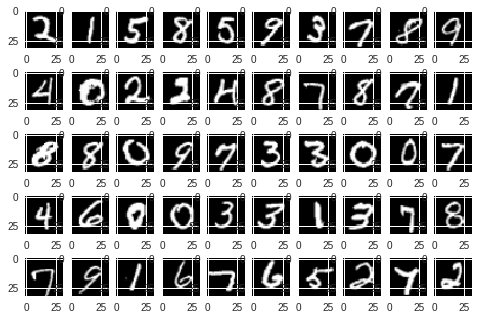

Epoch: 7 - cost= 0.03319
Epoch: 7 - cost= 0.03221
Epoch: 7 - cost= 0.03239
Epoch: 7 - cost= 0.03214
Epoch: 7 - cost= 0.03325
Epoch: 7 - cost= 0.03242
Epoch: 7 - cost= 0.03340
Epoch: 7 - cost= 0.03292
Epoch: 7 - cost= 0.03367
Epoch: 7 - cost= 0.03298
Epoch: 7 - cost= 0.03302
Epoch: 7 - cost= 0.03257
Epoch: 7 - cost= 0.03318
Epoch: 7 - cost= 0.03334
Epoch: 7 - cost= 0.03240
Epoch: 7 - cost= 0.03122
Epoch: 7 - cost= 0.03298
Epoch: 7 - cost= 0.03200
Epoch: 7 - cost= 0.03264
Epoch: 7 - cost= 0.03259
Epoch: 7 - cost= 0.03315
Epoch: 7 - cost= 0.03258
Epoch: 7 - cost= 0.03337
Epoch: 7 - cost= 0.03229
Epoch: 7 - cost= 0.03337
Epoch: 7 - cost= 0.03216
Epoch: 7 - cost= 0.03345
Epoch: 7 - cost= 0.03348
Epoch: 7 - cost= 0.03503
Epoch: 7 - cost= 0.03225
Epoch: 7 - cost= 0.03397
Epoch: 7 - cost= 0.03253
Epoch: 7 - cost= 0.03270
Epoch: 7 - cost= 0.03275
Epoch: 7 - cost= 0.03253
Epoch: 7 - cost= 0.03129
Epoch: 7 - cost= 0.03221
Epoch: 7 - cost= 0.03095
Epoch: 7 - cost= 0.03191
Epoch: 7 - cost= 0.03125


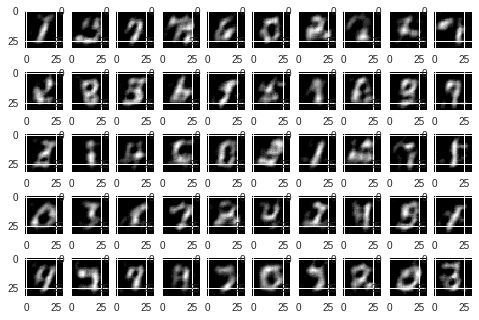

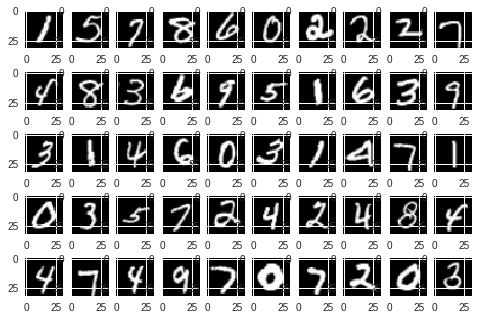

Epoch: 7 - cost= 0.03268
Epoch: 7 - cost= 0.03239
Epoch: 7 - cost= 0.03202
Epoch: 7 - cost= 0.03231
Epoch: 7 - cost= 0.03197
Epoch: 7 - cost= 0.03386
Epoch: 7 - cost= 0.03283
Epoch: 7 - cost= 0.03329
Epoch: 7 - cost= 0.03271
Epoch: 7 - cost= 0.03277
Epoch: 7 - cost= 0.03129
Epoch: 7 - cost= 0.03213
Epoch: 7 - cost= 0.03198
Epoch: 7 - cost= 0.03137
Epoch: 7 - cost= 0.03214
Epoch: 7 - cost= 0.03323
Epoch: 7 - cost= 0.03234
Epoch: 7 - cost= 0.03347
Epoch: 7 - cost= 0.03235
Epoch: 7 - cost= 0.03467
Epoch: 7 - cost= 0.03336
Epoch: 7 - cost= 0.03338
Epoch: 7 - cost= 0.03312
Epoch: 7 - cost= 0.03202
Epoch: 7 - cost= 0.03240
Epoch: 7 - cost= 0.03184
Epoch: 7 - cost= 0.03143
Epoch: 7 - cost= 0.03388
Epoch: 7 - cost= 0.03316
Epoch: 7 - cost= 0.03538
Epoch: 7 - cost= 0.03369
Epoch: 7 - cost= 0.03386
Epoch: 7 - cost= 0.03294
Epoch: 7 - cost= 0.03348
Epoch: 7 - cost= 0.03309
Epoch: 7 - cost= 0.03083
Epoch: 7 - cost= 0.03101
Epoch: 7 - cost= 0.03051
Epoch: 7 - cost= 0.03039
Epoch: 7 - cost= 0.03160


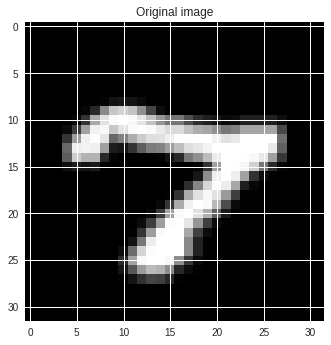

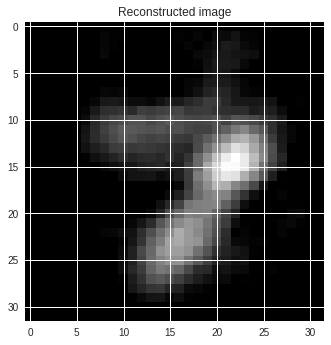

In [26]:
with tf.Session() as sess:
  
  sess.run(tf.global_variables_initializer())
  
  for epoch in range(epochs):
    for batch in range(num_batches):
      
      images, _ = mnist.train.next_batch(batch_size)
      images = images.reshape((-1, 28, 28, 1))
      images = resize_images(images)
      
      
      _, num_loss = sess.run([train_op, loss], feed_dict={inputs: images})
         
      print('Epoch: {} - cost= {:.5f}'.format((epoch + 1), num_loss))
      
      if batch % 100 == 0:
        
        _, num_loss, re_images = sess.run([train_op, loss, rec_images], feed_dict={inputs: images})
        
        plt.figure(1)
        plt.title('Reconstructed Images')
        for i in range(50):
          plt.subplot(5, 10, i+1)
          plt.imshow(re_images[i, ..., 0], cmap='gray')

        plt.figure(2)
        plt.title('Input Images')
        for i in range(50):
          plt.subplot(5, 10, i+1)
          plt.imshow(images[i, ..., 0], cmap='gray')
        plt.show()
        
  images, _ = mnist.train.next_batch(1)
  images = images.reshape((-1, 28, 28, 1))
  images = resize_images(images)
  
  image = sess.run([rec_images], feed_dict={inputs: images})[0]
  
  plt.figure(1)
  plt.title("Original image")
  plt.imshow(images[0, ..., 0], cmap="gray")
  
  plt.figure(2)
  plt.title("Reconstructed image")
  plt.imshow(image[0, ..., 0], cmap="gray")
  
  plt.show()